**INTRODUCTION**

The decision tree technique will primarily use victim record data since it provides a highly effective structure within which to lay out options and analyze the potential repercussions of those options. They also assist you in developing a balanced picture of the risks and benefits of each conceivable course of action.

**ABOUT THE DATA**

The record data that Decision Tree used relates to the categories of violent crime that include homicide (including murder and non-negligent manslaughter), robbery, and serious assault. Violent crime also includes rape. Offenses classified as violent involve the actual use of, or the threat to use, physical force.

Only offenses for which a report has been filed are included in the data displayed on the Crime Data Explorer; it is not a comprehensive record of all crimes. Understanding the multiple factors that contribute to criminal behavior and the reporting of crimes in a community is essential before attempting to analyze the data. In the absence of these considerations, the data that are currently available may be deceptive. The size and density of the population, the economy, the unemployment rate, the policies regarding prosecution, the judiciary, and corrections, the administrative and investigative focus of law enforcement, how people feel about crime and the police, and the actual strength of the police force are all important factors to consider.

The dataset consists of three categories of information regarding victims of violent crimes: their age, gender and race together with the various types of crimes that they were victims of.

**IMPORT LIBRARIES**

In [44]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

**IMPORT DATA**

In [45]:
# Read cleaned and balanced data
age_data = pd.read_csv('../../data/modified-data/cleaned_agedata_dt.csv')
race_data = pd.read_csv("../../data/modified-data/cleaned_racedata_dt.csv")
gender_data = pd.read_csv("../../data/modified-data/cleaned_genderdata_dt.csv")
state_data = pd.read_csv('../../data/modified-data/cleaned_state_crime_record_data.csv')


*VICTIMS AGE DATA*

In [46]:
#HEAD OF DATA
age_data.head()

,Unnamed: 0,Offense,Under10,Under15,Under20,Under25,Under30,Under35,Under40,Under45,Under50,Under55,Under60,Under65,Over65,Unknown,Crime_Type
0,1,Robbery,812,3580,16183,20963,18514,16214,13432,10666,8668,7911,7234,5098,5705,1038,NotGrave
1,2,Embezzlement,10,15,125,349,457,590,680,600,611,619,581,494,1263,143,NotGrave
2,3,Burglary/Breaking & Entering,2299,2731,19470,48303,56547,57358,53607,46521,42398,41461,41581,35348,67410,7005,NotGrave
3,4,Destruction/Damage/Vandalism,2390,3255,52537,115237,128312,124755,114773,99933,88356,81557,77720,62329,99641,14281,NotGrave
4,5,Stolen Property Offenses,956,282,3414,7367,8856,8372,7776,6677,6268,5607,6085,4067,7195,10162,NotGrave


*VICTIMS GENDER DATA*

In [47]:
#HEAD OF DATA
gender_data.head()

,Unnamed: 0,Offense,Male,Female,category
0,1,Embezzlement,3391,3071,Male
1,2,Robbery,86466,49124,Male
2,3,Extortion/Blackmail,9020,3354,Male
3,4,Motor Vehicle Theft,320919,197047,Male
4,5,Counterfeiting/Forgery,28217,26558,Male


*VICTIMS RACE DATA*

In [48]:
#HEAD OF DATA
race_data.head()

,Unnamed: 0,White,Black_or_African_American,American_Indian_or_Alaska_Native,Asian,Native_Hawaiian_or_Other_Pacific_Islander,Unknown,category
0,1,664950,299579,10595,21483,1531,66938,White
1,2,459,60,9,8,0,35,White
2,3,41299,6681,380,1431,79,6298,White
3,4,344639,122261,4400,9595,1224,38540,White
4,5,126846,32509,3219,2211,365,11893,White


*VIOLENT CRIME CATEGORY CATEGORY*

In [49]:
#HEAD OF DATA
state_data.head()

,State,Year,Population,Property_Crime_Rate,Property_Burglary_Rate,Property_Larceny_Rate,Property_Motor_Rate,Violent_Crime_Rate,Violent_Assault_Rate,Violent_Murder_Rate,Violent_Rape_Rate,Violent_Robbery_Rate
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,8.6,27.5
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,7.6,19.1
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,6.5,22.5
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,5.7,24.7
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,11.7,29.1


**DATA CLEANING**

For the above datasets, columns that aren't necessary are deleted, and it is determined whether or not the dataset contains any values that are not applicable or duplicates.

In [50]:
#CLEAN THE DATA
#AGE DATA
#REMOVE THE FIRST COLUMN 
age_data = age_data.drop(columns=['Unnamed: 0', 'Offense'])
#CHECK FOR MISSING VALUES
age_null_count = age_data.isnull().sum()
#GENDER DATA
#REMOVE THE FIRST COLUMN 
gender_data = gender_data.drop(columns=['Unnamed: 0','Offense'])
#CHECK FOR MISSING VALUES
gender_null_count = gender_data.isnull().sum()
#RACE DATA
#REMOVE THE FIRST COLUMN
race_data = race_data.drop(columns=['Unnamed: 0'])
#CHECK FOR MISSING VALUES
race_null_count = race_data.isnull().sum()
#STATE DATA
#CHECK FOR MISSING VALUES
state_null_count = state_data.isnull().sum()

**DATA SUMMARY:**

In Python, the describe function can be used to get descriptive or summary statistics (). Describe The function gives the mean, standard deviation, IQR, minimum value, maximum value, mode and so on.

*VICTIM AGE DATA SUMMARY*

In [51]:
#SUMMARIZE THE AGE DATA

age_data_describe = age_data.describe().loc[['min','mean','max']]
age_data_dtype = age_data.dtypes
age_data_describe = age_data_describe.append(age_data_dtype,ignore_index=True)
age_data_describe = age_data_describe.rename(index={0:'min',1:'mean',2:'max',3:'dtype'})
age_data_describe = age_data_describe.transpose()
print(age_data_describe)

               min           mean       max   dtype
Under10       10.0   21119.529412   81158.0   int64
Under15       15.0        39137.0  143951.0   int64
Under20      125.0  102390.764706  256062.0   int64
Under25      349.0  174280.529412  351830.0   int64
Under30      457.0  188563.294118  374771.0   int64
Under35      590.0  177382.941176  347661.0   int64
Under40      680.0  154985.470588  292157.0   int64
Under45      600.0  126095.882353  224222.0   int64
Under50      611.0  106786.352941  175238.0   int64
Under55      619.0        94931.0  163137.0   int64
Under60      581.0   86457.529412  154999.0   int64
Under65      494.0   65247.352941  125770.0   int64
Over65      1263.0  102299.470588  222164.0   int64
Unknown      143.0   18377.823529   32956.0   int64
Crime_Type     NaN            NaN       NaN  object


*VICTIM GENDER DATA SUMMARY*

In [52]:
#SUMMARIZE THE GENDER DATA 
df_describe = gender_data.describe().loc[['min','mean','max']]
df_dtype = gender_data.dtypes
df_describe = df_describe.append(df_dtype,ignore_index=True)
df_describe = df_describe.rename(index={0:'min',1:'mean',2:'max',3:'dtype'})
df_describe = df_describe.transpose()
print(df_describe)

             min      mean       max   dtype
Male       335.0  138022.5  508037.0   int64
Female    1659.0  119444.0  549220.0   int64
category     NaN       NaN       NaN  object


*VICTIM RACE DATA SUMMARY*

In [53]:
#SUMMARIZE THE RACE DATA  
df_describe = race_data.describe().loc[['min','mean','max']]
df_dtype = race_data.dtypes
df_describe = df_describe.append(df_dtype,ignore_index=True)
df_describe = df_describe.rename(index={0:'min',1:'mean',2:'max',3:'dtype'})
df_describe = df_describe.transpose()
print(df_describe)

                                             min            mean        max  \
White                                      459.0  1509511.888889  5372573.0   
Black_or_African_American                   60.0   648793.833333  2088414.0   
American_Indian_or_Alaska_Native             9.0         27830.5    86370.0   
Asian                                        8.0    42430.166667   166046.0   
Native_Hawaiian_or_Other_Pacific_Islander    0.0     5009.888889    16887.0   
Unknown                                     35.0   134815.111111   537555.0   
category                                     NaN             NaN        NaN   

                                            dtype  
White                                       int64  
Black_or_African_American                   int64  
American_Indian_or_Alaska_Native            int64  
Asian                                       int64  
Native_Hawaiian_or_Other_Pacific_Islander   int64  
Unknown                                     int64  
cat

*CRIME CATEGORY DATA SUMMARY*

In [54]:

#SUMMARIZE THE VIOLENT CRIME DATA
state_data_describe = state_data.describe().loc[['min','mean','max']]
state_data_dtype = state_data.dtypes
state_data_describe = state_data_describe.append(state_data_dtype,ignore_index=True)
state_data_describe = state_data_describe.rename(index={0:'min',1:'mean',2:'max',3:'dtype'})
state_data_describe = state_data_describe.transpose()
print(state_data_describe)

                             min            mean          max    dtype
Year                      1960.0     1989.544141       2019.0    int64
Population              226167.0  9708501.690209  328239523.0    int64
Property_Crime_Rate        573.1     3542.202311       9512.1  float64
Property_Burglary_Rate     126.3       876.53252       2906.7  float64
Property_Larceny_Rate      293.3     2322.659133       5833.8  float64
Property_Motor_Rate         28.4        343.0113       1839.9  float64
Violent_Crime_Rate           9.5      397.877047       2921.8  float64
Violent_Assault_Rate         3.6       237.36504       1557.6  float64
Violent_Murder_Rate          0.2        6.477207         80.6  float64
Violent_Rape_Rate            0.8       30.179872        161.6  float64
Violent_Robbery_Rate         1.9      123.853258       1635.1  float64
State                        NaN             NaN          NaN   object


**DECISION TREE**

A decision tree is an aid to decision making that employs a tree-like model of decisions and the potential implications, such as the outcomes of random events, the costs and benefits of resources, and the overall value of the decision. If your method consists only of if/then statements, this is one approach to present it.

As a prominent tool in machine learning, decision trees are also widely used in the field of operations research, particularly in the field of decision analysis, to determine which course of action is most likely to result in the desired outcome.

Each node inside a decision tree represents a "test" on an attribute (such as whether a coin is headed up or down), each branch reflects the result of that test, and each leaf node represents a class label (decision taken after computing all attributes). The branches stand for different kinds of categorization schemes.

**Split the dataset into training and testing sets**

The data is separated into training data and testing data, and each of the three datasets contains unique information. Before continuing, the number of samples that will be used for each sample will be calculated.

**HYPER-PARAMETERS TUNING**

The features of the model known as parameters are those that are learned by the model from the data. On the other hand, hyperparameters are arguments that are accepted by a model-making function. These hyperparameters can be adjusted to reduce overfitting, which ultimately results in a model that is more generalizable. The method of hyperparameter tuning, which involves calibrating our model by determining which hyperparameters should be used to extend our model, has been given its own name.

**FOR VICTIM AGE DATA**

*DATA NORMAIZATION*

In [55]:
#THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH CATEGORY
from locale import normalize

Crime_Type_Grave_count = age_data['Crime_Type'].value_counts()['Grave']
Crime_Type_NotGrave_count = age_data['Crime_Type'].value_counts()['NotGrave']
Crime_Type_Grave_norm = age_data['Crime_Type'].value_counts(normalize = True)['Grave']
Crime_Type_NotGrave_norm = age_data['Crime_Type'].value_counts(normalize = True)['NotGrave']

print("Number of points with category Grave: {0:2d} {1:}".format(Crime_Type_Grave_count, Crime_Type_Grave_norm))
print("Number of points with category Not Grave: {0:2d} {1:}".format(Crime_Type_NotGrave_count, Crime_Type_NotGrave_norm))

Number of points with category Grave:  9 0.5294117647058824
Number of points with category Not Grave:  8 0.47058823529411764


*SPLITTING DATA INTO TRAINING AND TESTING DATA IN SKLEARN*

In [56]:
#MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="category" COLUMN and X="everything else"
X = age_data.drop(columns = ['Crime_Type'])
Y = age_data['Crime_Type']
#PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.62, random_state=2)

#CONSISTENCY CHECK
print(type(x_train))
print("X train shape: ",x_train.shape)
print(type(y_train))
print("Y train shape: ",y_train.shape)
print(type(x_test))
print("X test shape: ",x_test.shape)
print(type(y_test))
print("Y test shape",y_test.shape)

<class 'pandas.core.frame.DataFrame'>
X train shape:  (6, 14)
<class 'pandas.core.series.Series'>
Y train shape:  (6,)
<class 'pandas.core.frame.DataFrame'>
X test shape:  (11, 14)
<class 'pandas.core.series.Series'>
Y test shape (11,)


*DECISION TREE MODEL FOR VICTIM AGE DATA*

In [57]:
#set seed
np.random.seed(2)
# TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

#MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

*CONFUSION MATRIX FOR VICTIM AGE MODEL*

------TEST------
ACCURACY: 0.73
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 0.57
POSITIVE RECALL (Y=1): 1.00
POSITIVE PRECISION (Y=1): 1.00
[[4 0]
 [3 4]]


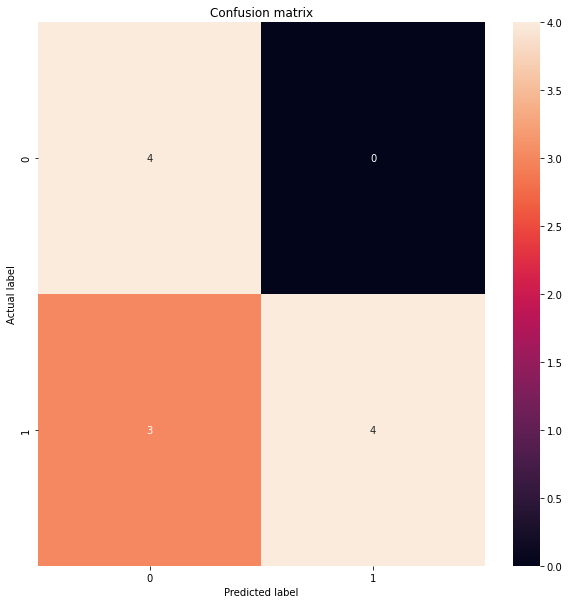

In [58]:
#CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix


def confusion_plot(y_data,y_pred):
    cm = confusion_matrix(y_data, y_pred)
    print('ACCURACY: {:.2f}'.format(accuracy_score(y_data, y_pred)))
    print('NEGATIVE RECALL (Y=0): {:.2f}'.format(recall_score(y_data, y_pred, pos_label='Grave')))
    print('NEGATIVE PRECISION (Y=0): {:.2f}'.format(precision_score(y_data, y_pred, pos_label='Grave')))
    print('POSITIVE RECALL (Y=1): {:.2f}'.format(recall_score(y_data, y_pred, pos_label='Grave')))
    print('POSITIVE PRECISION (Y=1): {:.2f}'.format(precision_score(y_data, y_pred, pos_label='NotGrave')))
    print(cm)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d", )
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

#TEST SET CONFUSION MATRIX
print("------TEST------")
confusion_plot(y_test,yp_test)

*DECISION TREE VISUALIZATION*

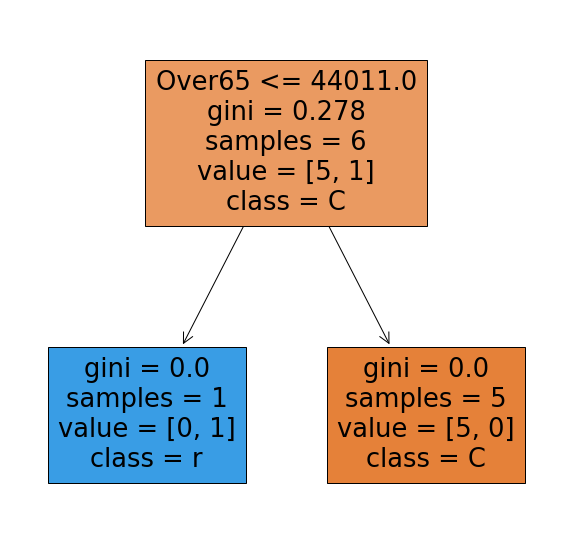

In [59]:
# VISUALIZE THE DECISION TREE 
def plot_tree(model,X,Y):
    plt.figure(figsize=(10,10))
    tree.plot_tree(model, feature_names=X.columns, class_names=Y.name, filled=True)
    plt.show()

plot_tree(model,X,Y)

*HYPER-PARAMETERS TUNING*

In [60]:
#set seed
np.random.seed(6)
#HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,17):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label='Grave'),recall_score(y_test, yp_test,pos_label='NotGrave')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label='Grave'),recall_score(y_train, yp_train,pos_label='NotGrave')])



------TEST------
ACCURACY: 0.82
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 0.67
POSITIVE RECALL (Y=1): 1.00
POSITIVE PRECISION (Y=1): 1.00
[[4 0]
 [2 5]]


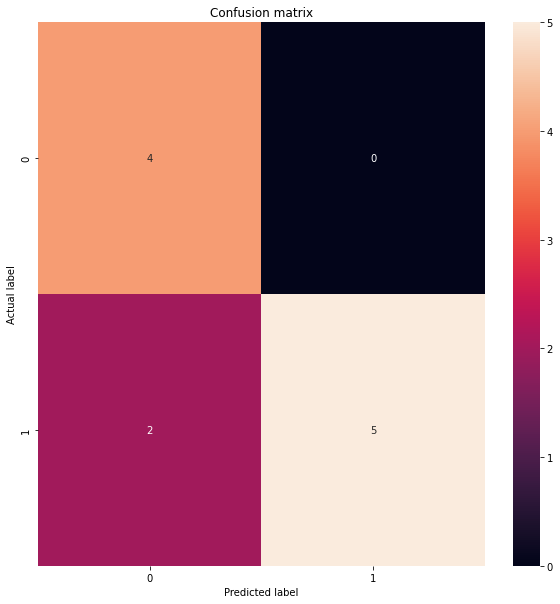

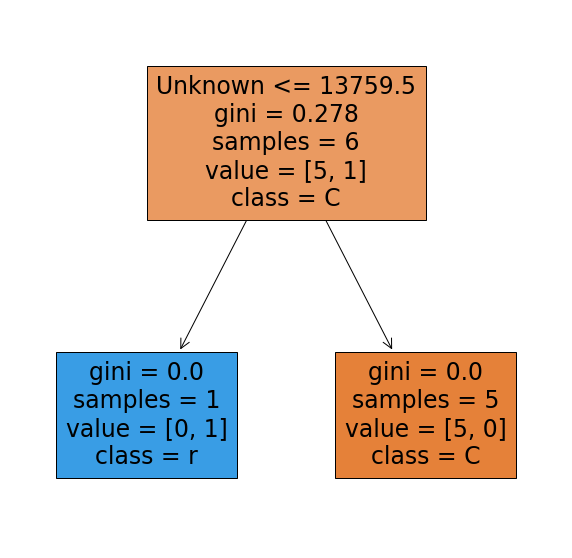

In [61]:
#### TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=18)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

# THE MODEL ON THE TEST SET
print("------TEST------")
confusion_plot(y_test,yp_test)
plot_tree(model,X,Y)

*INFERENCE FOR VICTIM AGE DECISION MODEL:*
- The split ratio of teh model is 62% of training data and rest as testinf data, it is categoried with crime type variable(grave and not grave).
- The accurary of the model before hyper-parametric tuning is 73%.
- The accuracy of the model after hyper parametric tuning has slightly increased to 82%.
- The model is not underfitting as accuracy is greater than 50%.
- The decision tree visulization is about the Age over 65 and Unknown Age of the data, which classifies into different samples. As the sample of the data is very small and the data category is less, the decision tree doesn't have huge classification if the data.
- As the max_depth increases, the accuracy increases and the optimal tree becomes better.

NOTE: Since the dataset is small and the accuracy of the model is high, the graph for hyperparametric isn't required as the graph shows similar results for training and testing data.

**FOR VICTIM GENDER DATA**

*DATA NORMAIZATION*

In [62]:
#THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH CATEGORY
from locale import normalize

category_male_count = gender_data['category'].value_counts()['Male']
category_female_count = gender_data['category'].value_counts()['Female']
category_male_norm = gender_data['category'].value_counts(normalize = True)['Male']
category_female_norm = gender_data['category'].value_counts(normalize = True)['Female']

print("Number of points with category white: {0:2d} {1:}".format(category_male_count, category_male_norm))
print("Number of points with category black: {0:2d} {1:}".format(category_female_count, category_female_norm))

Number of points with category white: 10 0.625
Number of points with category black:  6 0.375


*SPLITTING DATA INTO TRAINING AND TESTING DATA IN SKLEARN*

In [63]:
#MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="category" COLUMN and X="everything else"
X = gender_data.drop(columns = ['category'])
Y = gender_data['category']
#PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=.52, random_state=2)

#CONSISTENCY CHECK
print(type(x_train))
print("X train shape: ",x_train.shape)
print(type(y_train))
print("Y train shape: ",y_train.shape)
print(type(x_test))
print("X test shape: ",x_test.shape)
print(type(y_test))
print("Y test shape",y_test.shape)

<class 'pandas.core.frame.DataFrame'>
X train shape:  (8, 2)
<class 'pandas.core.series.Series'>
Y train shape:  (8,)
<class 'pandas.core.frame.DataFrame'>
X test shape:  (8, 2)
<class 'pandas.core.series.Series'>
Y test shape (8,)


*DECISION TREE MODEL FOR VICTIM GENDER DATA*

In [64]:
#set seed
np.random.seed(2)
# TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)
#MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

*CONFUSION MATRIX FOR VICTIM GENDER MODEL*

------TEST------
ACCURACY: 0.88
NEGATIVE RECALL (Y=0): 0.83
NEGATIVE PRECISION (Y=0): 1.00
POSITIVE RECALL (Y=1): 0.83
POSITIVE PRECISION (Y=1): 0.67
[[2 0]
 [1 5]]


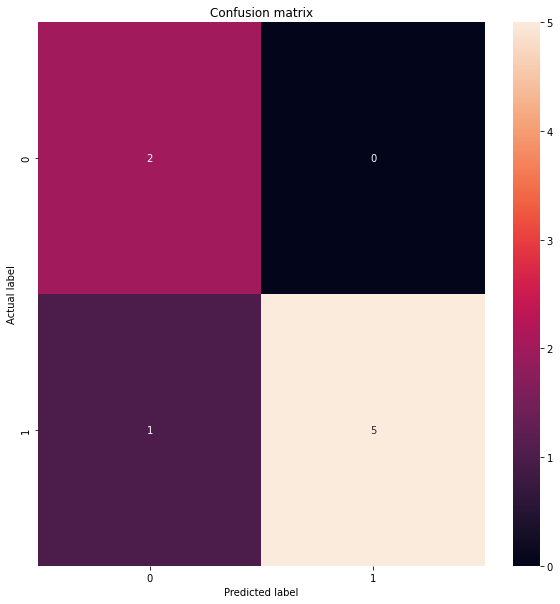

In [65]:
#CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix


def confusion_plot(y_data,y_pred):
    cm = confusion_matrix(y_data, y_pred)
    print('ACCURACY: {:.2f}'.format(accuracy_score(y_data, y_pred)))
    print('NEGATIVE RECALL (Y=0): {:.2f}'.format(recall_score(y_data, y_pred, pos_label='Male')))
    print('NEGATIVE PRECISION (Y=0): {:.2f}'.format(precision_score(y_data, y_pred, pos_label='Male')))
    print('POSITIVE RECALL (Y=1): {:.2f}'.format(recall_score(y_data, y_pred, pos_label='Male')))
    print('POSITIVE PRECISION (Y=1): {:.2f}'.format(precision_score(y_data, y_pred, pos_label='Female')))
    print(cm)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d", )
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

#TEST SET CONFUSION MATRIX
print("------TEST------")
confusion_plot(y_test,yp_test)

*DECISION TREE VISUALIZATION*

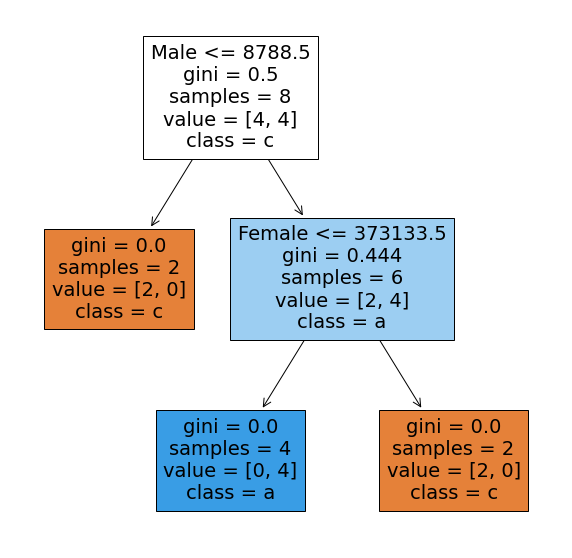

In [66]:
# VISUALIZE THE DECISION TREE 
def plot_tree(model,X,Y):
    plt.figure(figsize=(10,10))
    tree.plot_tree(model, feature_names=X.columns, class_names=Y.name, filled=True)
    plt.show()

plot_tree(model,X,Y)

*HYPER-PARAMETERS TUNING*

In [67]:
#set seed
np.random.seed(676)
#HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,17):
    model = tree.DecisionTreeClassifier(max_depth=18)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label='Male'),recall_score(y_test, yp_test,pos_label='Female')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label='Male'),recall_score(y_train, yp_train,pos_label='Female')])



------TEST------
ACCURACY: 0.88
NEGATIVE RECALL (Y=0): 0.83
NEGATIVE PRECISION (Y=0): 1.00
POSITIVE RECALL (Y=1): 0.83
POSITIVE PRECISION (Y=1): 0.67
[[2 0]
 [1 5]]


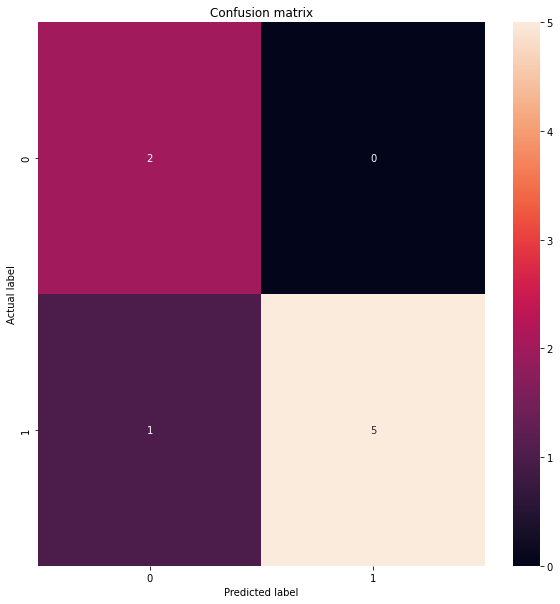

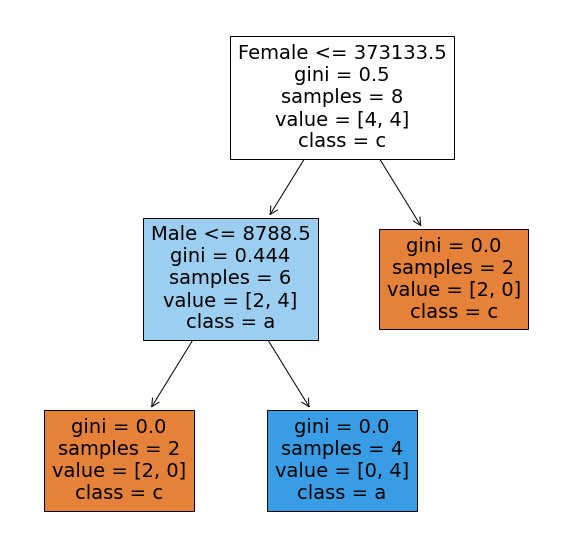

In [68]:
#### TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=18)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

# THE MODEL ON THE TEST SET
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,Y)

*INFERENCE FOR VICTIM GENDER DECISION MODEL:*
- The split ratio of teh model is 52% of training data and rest as testinf data, it is categoried with category variable(male and female).
- The accurary of the model before and after hyper-parametric tuning is 88%.
- The model is not underfitting as accuracy is greater than 50%.
- As the max_depth increases, the accuracy increases and the optimal tree becomes better.
- The decision tree visulization is about the Male and Female category of the data, which classifies into different samples.

NOTE: Since the dataset is small and the accuracy of the model is high, the graph for hyperparametric isn't required as the graph shows similar results for training and testing data.

**FOR VICTIM RACE DATA**

*DATA NORMALIZATION*

In [69]:
#THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH CATEGORY
from locale import normalize

category_white_count = race_data['category'].value_counts()['White']
category_black_count = race_data['category'].value_counts()['Black_or_African_American']
category_white_norm = race_data['category'].value_counts(normalize = True)['White']
category_black_norm = race_data['category'].value_counts(normalize = True)['Black_or_African_American']

print("Number of points with category white: {0:2d} {1:}".format(category_white_count, category_white_norm))
print("Number of points with category black: {0:2d} {1:}".format(category_black_count, category_black_norm))

Number of points with category white:  8 0.4444444444444444
Number of points with category black: 10 0.5555555555555556


*SPLITTING DATA INTO TRAINING AND TESTING DATA IN SKLEARN*

In [70]:
#MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="category" COLUMN and X="everything else"
X = race_data.drop(columns = ['category'])
Y = race_data['category']
#PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=.52, random_state=2)

#CONSISTENCY CHECK
print(type(x_train))
print("X train shape: ",x_train.shape)
print(type(y_train))
print("Y train shape: ",y_train.shape)
print(type(x_test))
print("X test shape: ",x_test.shape)
print(type(y_test))
print("Y test shape",y_test.shape)

<class 'pandas.core.frame.DataFrame'>
X train shape:  (9, 6)
<class 'pandas.core.series.Series'>
Y train shape:  (9,)
<class 'pandas.core.frame.DataFrame'>
X test shape:  (9, 6)
<class 'pandas.core.series.Series'>
Y test shape (9,)


*DECISION TREE MODEL FOR VICTIM RACE DATA*

In [71]:
#set seed
np.random.seed(2)
# TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)
#MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

*CONFUSION M ATRIX FOR VICTIM RACE MODEL*

------TEST------
ACCURACY: 0.89
NEGATIVE RECALL (Y=0): 0.80
NEGATIVE PRECISION (Y=0): 1.00
POSITIVE RECALL (Y=1): 0.80
POSITIVE PRECISION (Y=1): 0.80
[[4 0]
 [1 4]]


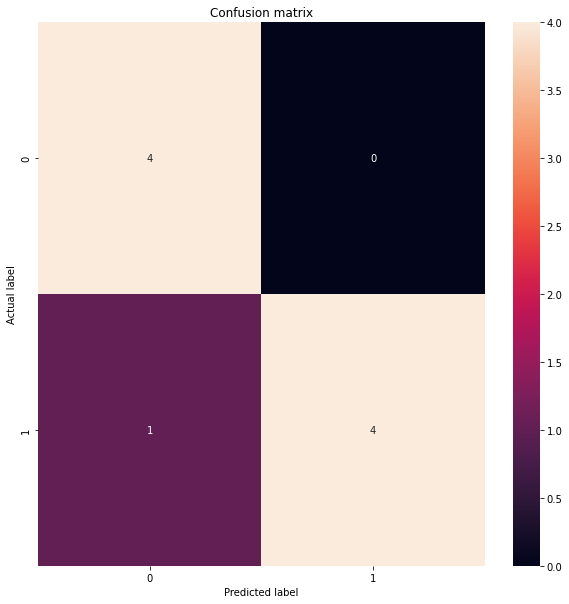

In [72]:
#CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix


def confusion_plot(y_data,y_pred):
    cm = confusion_matrix(y_data, y_pred)
    print('ACCURACY: {:.2f}'.format(accuracy_score(y_data, y_pred)))
    print('NEGATIVE RECALL (Y=0): {:.2f}'.format(recall_score(y_data, y_pred, pos_label='White')))
    print('NEGATIVE PRECISION (Y=0): {:.2f}'.format(precision_score(y_data, y_pred, pos_label='White')))
    print('POSITIVE RECALL (Y=1): {:.2f}'.format(recall_score(y_data, y_pred, pos_label='White')))
    print('POSITIVE PRECISION (Y=1): {:.2f}'.format(precision_score(y_data, y_pred, pos_label='Black_or_African_American')))
    print(cm)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d", )
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

#TEST SET CONFUSION MATRIX
print("------TEST------")
confusion_plot(y_test,yp_test)

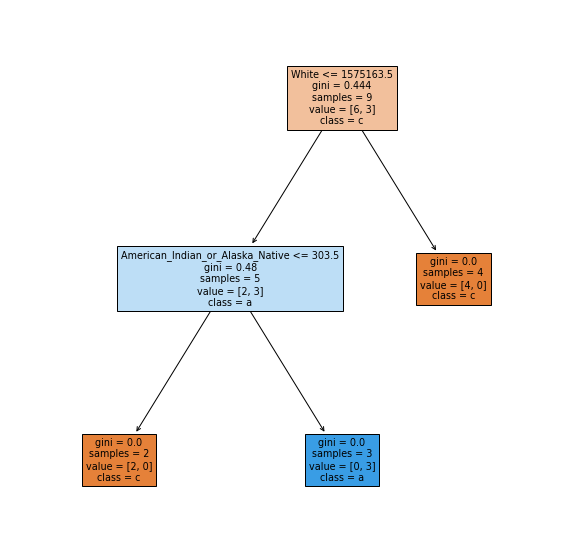

In [73]:
# VISUALIZE THE DECISION TREE 
def plot_tree(model,X,Y):
    plt.figure(figsize=(10,10))
    tree.plot_tree(model, feature_names=X.columns, class_names=Y.name, filled=True)
    plt.show()

plot_tree(model,X,Y)

*HYPER-PARAMETERS TUNING*

In [74]:
#set seed
np.random.seed(67)
#HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,17):
    model = tree.DecisionTreeClassifier(max_depth=12)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label='White'),recall_score(y_test, yp_test,pos_label='Black_or_African_American')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label='White'),recall_score(y_train, yp_train,pos_label='Black_or_African_American')])



------TEST------
ACCURACY: 0.89
NEGATIVE RECALL (Y=0): 0.80
NEGATIVE PRECISION (Y=0): 1.00
POSITIVE RECALL (Y=1): 0.80
POSITIVE PRECISION (Y=1): 0.80
[[4 0]
 [1 4]]


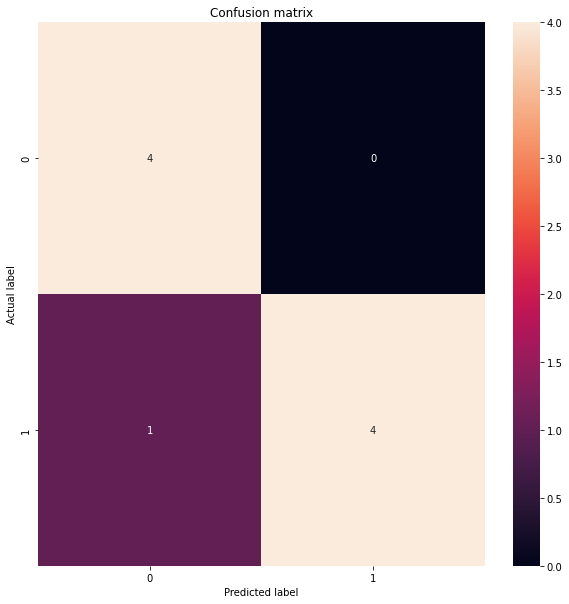

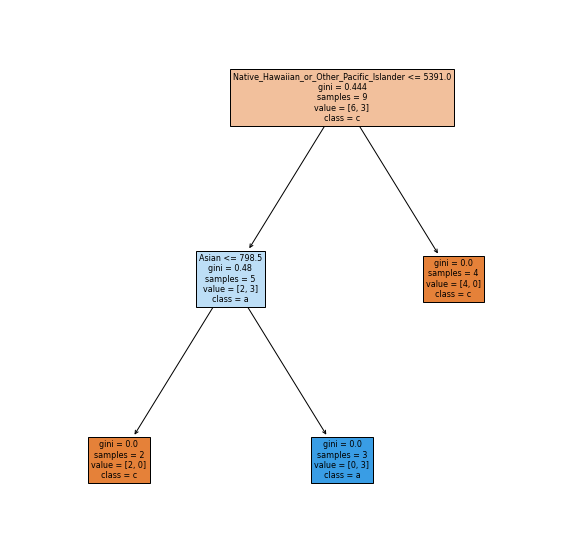

In [75]:
#### TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=50)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

# THE MODEL ON THE TEST SET
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,Y)

*INFERENCE FOR VICTIM RACE DECISION MODEL:*
- The split ratio of teh model is 52% of training data and rest as testinf data, it is categoried with race category variable.
- The accurary of the model before and after hyper-parametric tuning is 89%.
- The model is not underfitting as accuracy is greater than 50%.
- As the max_depth increases, the accuracy increases and the optimal tree becomes better.
- The decision tree visulization is about White and Pacific Islander category of the data, which classifies into different samples.

NOTE: Since the dataset is small and the accuracy of the model is high, the graph for hyperparametric isn't required as the graph shows similar results for training and testing data.

**FOR VIOLENT CRIME CATEGORY DATA**

*DATA NORMLIZATION*

In [76]:
#create new column with the predicted category
state_data['Violent_label'] = state_data[['Violent_Assault_Rate', 'Violent_Murder_Rate','Violent_Rape_Rate','Violent_Robbery_Rate']].idxmax(axis=1)
#create table for only property crime datasets
violent_df = state_data[['Violent_Assault_Rate', 'Violent_Murder_Rate','Violent_Rape_Rate','Violent_Robbery_Rate','Violent_label']].copy()

#THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH CATEGORY
from locale import normalize

Violent_Assault_Rate_count = violent_df['Violent_label'].value_counts()['Violent_Assault_Rate']
Violent_Robbery_Rate_count = violent_df['Violent_label'].value_counts()['Violent_Robbery_Rate']
Violent_Rape_Rate_count = violent_df['Violent_label'].value_counts()['Violent_Rape_Rate']
Violent_Rape_Rate_norm = violent_df['Violent_label'].value_counts(normalize = True)['Violent_Rape_Rate']
Violent_Assault_Rate_norm = violent_df['Violent_label'].value_counts(normalize = True)['Violent_Assault_Rate']
Violent_Robbery_Rate_norm = violent_df['Violent_label'].value_counts(normalize = True)['Violent_Robbery_Rate']
print("Number of points with category Assualt: {0:2d} {1:}".format(Violent_Assault_Rate_count, Violent_Assault_Rate_norm))
print("Number of points with category Robbery: {0:2d} {1:}".format(Violent_Robbery_Rate_count, Violent_Robbery_Rate_norm))
print("Number of points with category Rape: {0:2d} {1:}".format(Violent_Rape_Rate_count, Violent_Rape_Rate_norm))

Number of points with category Assualt: 2825 0.9069020866773676
Number of points with category Robbery: 287 0.09213483146067415
Number of points with category Rape:  3 0.0009630818619582664


*SPLITTING DATA INTO TRAINING AND TESTING DATA IN SKLEARN*

In [77]:
#MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="category" COLUMN and X="everything else"
X = violent_df.drop(columns = ['Violent_label'])
Y = violent_df['Violent_label']
#PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=2)

#CONSISTENCY CHECK
print(type(x_train))
print("X train shape: ",x_train.shape)
print(type(y_train))
print("Y train shape: ",y_train.shape)
print(type(x_test))
print("X test shape: ",x_test.shape)
print(type(y_test))
print("Y test shape",y_test.shape)

<class 'pandas.core.frame.DataFrame'>
X train shape:  (623, 4)
<class 'pandas.core.series.Series'>
Y train shape:  (623,)
<class 'pandas.core.frame.DataFrame'>
X test shape:  (2492, 4)
<class 'pandas.core.series.Series'>
Y test shape (2492,)


*DECISION TREE MODEL FOR VIOLENT CRIME CATEGORY DATA*

In [78]:
#set seed
np.random.seed(2)
# TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)
#MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)


*CONFUSION MATRIX FOR VIOLENT CATEGORY MODEL*

------TEST------
ACCURACY: 0.96


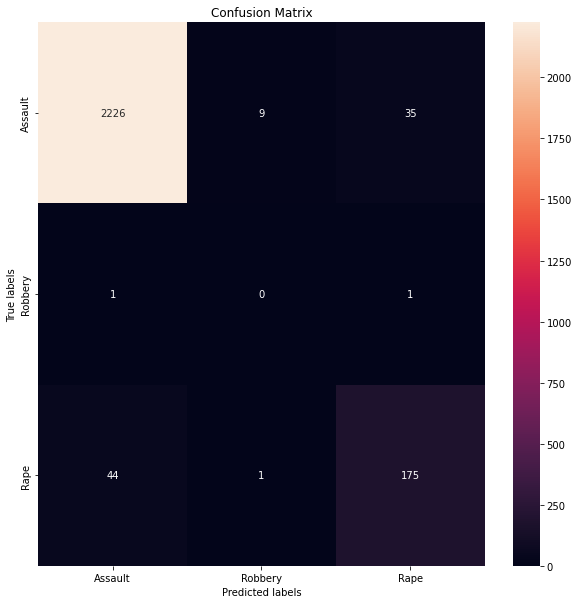

In [85]:
print("------TEST------")
print('ACCURACY: {:.2f}'.format(accuracy_score(y_test, yp_test)))
##Visualise Confusion Matrix
plt.figure(figsize=(10,10))
labels = ['Assault','Robbery','Rape']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(y_test, yp_test), annot=True, fmt='g', ax=ax1)
# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels')
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels)
plt.show()
plt.close()


*DECISION TREE VISUALIZATION*

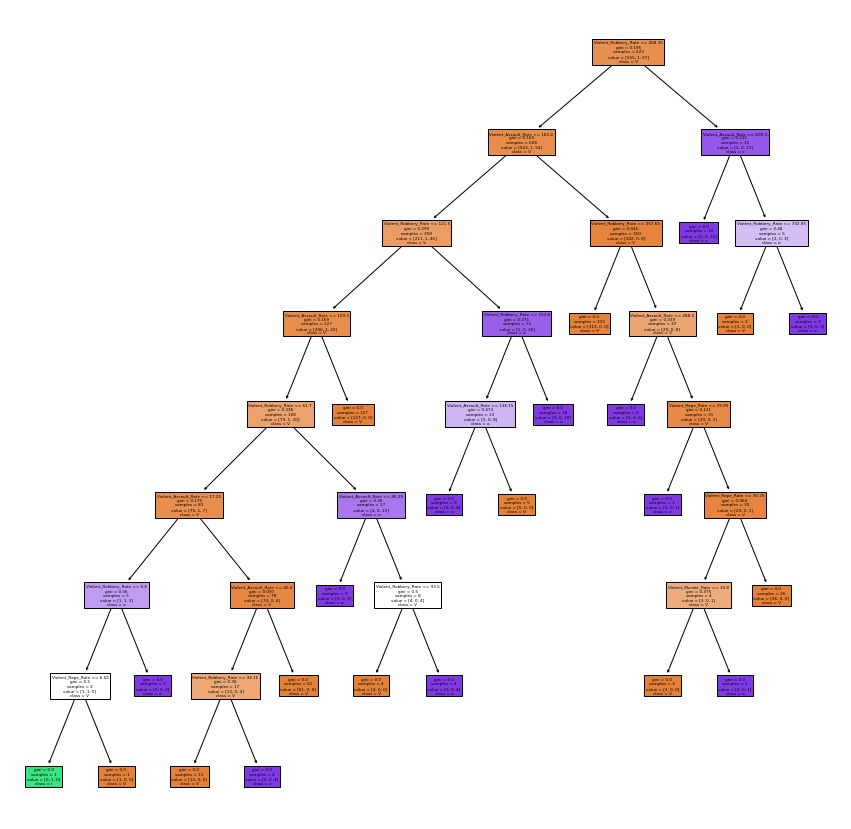

In [80]:
# VISUALIZE THE DECISION TREE 
def plot_tree(model,X,Y):
    plt.figure(figsize=(15,15))
    tree.plot_tree(model, feature_names=X.columns, class_names=Y.name, filled=True)
    plt.show()

plot_tree(model,X,Y)

*HYPER-PARAMETERS TUNING*

In [81]:
#set seed
np.random.seed(6)
#HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,17):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

------TEST------
ACCURACY: 0.96


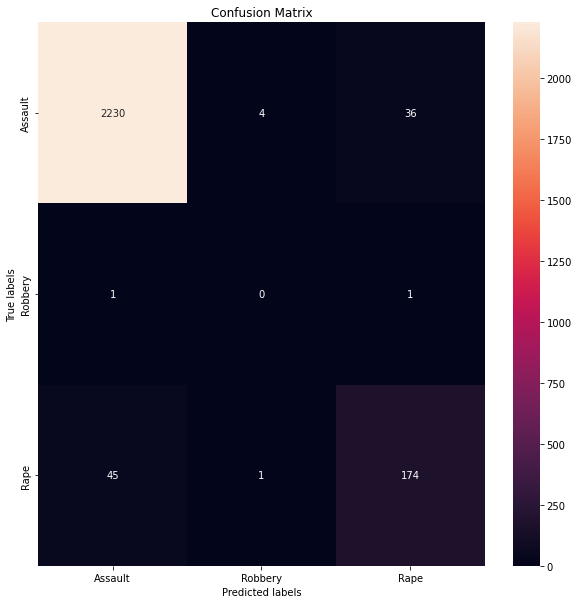

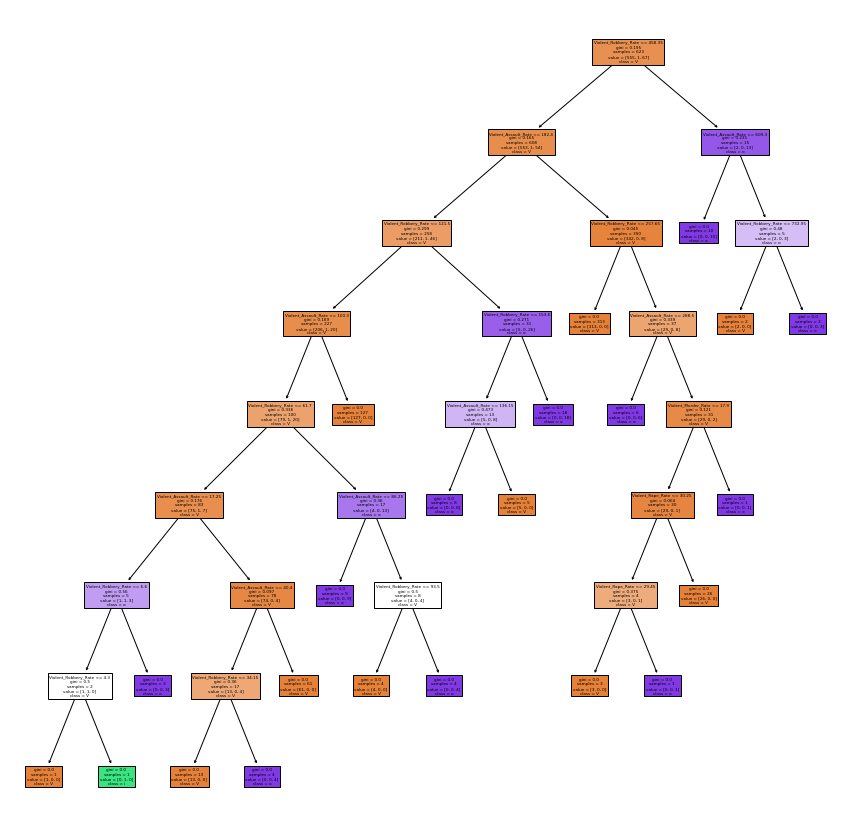

In [88]:
#### TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=18)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

# THE MODEL ON THE TEST SET
print("------TEST------")
print('ACCURACY: {:.2f}'.format(accuracy_score(y_test, yp_test)))
##Visualise Confusion Matrix
plt.figure(figsize=(10,10))
labels = ['Assault','Robbery','Rape']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(y_test, yp_test), annot=True, fmt='g', ax=ax1)
# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels')
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels)
plt.show()
plt.close()
plot_tree(model,X,Y)

*INFERENCE FOR VIOLENT CRIME CATEGORY DECISION MODEL:*
- The split ratio of teh model is 80% of training data and rest as testing data, it is categoried with violent category variable.
- The accurary of the model before and after hyper-parametric tuning is 97%.
- The model is not underfitting as accuracy is greater than 50%.
- As the max_depth increases, the accuracy increases and the optimal tree becomes better.
- The decision tree visulization are classified into different samples, accoring to the murder, robbery and rape violent crime category.


**CONCLUSION**

The purpose of this Decision Tree study was to categorize the age, race, and gender category based on the sorts of violent crimes committed. After hyper-parametric tuning, the model achieves an impressively high accuracy of 82% in predicting age, 88% in predicting gender, and 88% in predicting race. The tuning graph is not displayed above because the model performs similarly on both the training and testing data, which is limited in size. When looking at the Violent category model, since the data is of large size, the accuracy of the models 97% and the decision tree gives us a lot of explanantion when compared to the other datasets used.